In [202]:
import boto3
import json
import os
from os import listdir
from os.path import isfile, join
import glob
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import argrelextrema
import scipy.signal
# test

s3 = boto3.resource('s3')

In [203]:
def myconverter(o):
    if isinstance(o, datetime.datetime):
        return o.__str__()

In [204]:
def compute_4_maxima(TotalMaximaExtrema):
    #sorted_arr = []
    #print('In compute_4_largest function')
    #print('TotalMaximaExtrema: \n',TotalMaximaExtrema)
    if len(TotalMaximaExtrema) >= 5:
        #sorted_arr = np.argpartition(data.laX[TotalMaximaExtrema], -5)[-5:]
        sorted_arr = data.laX[TotalMaximaExtrema].sort_values(ascending=False).head(5)
        #print('max sorted_arr 5:\n', sorted_arr)
  
    elif len(TotalMaximaExtrema) == 4:
        #print('data.laX[TotalMaximaExtrema]',data.laX[TotalMaximaExtrema])
        #print('sorted:',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMaximaExtrema].sort_values(ascending=False)
        #print('sorted_arr :\n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[3]],
                                                   index = [sorted_arr.index[-1]]))
        #print('max sorted_arr_updated 4:\n',sorted_arr)
    elif len(TotalMaximaExtrema) == 3:
        #print('data.laX[TotalMaximaExtrema] : \n',data.laX[TotalMaximaExtrema])
        #print('sorted : \n',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMaximaExtrema].sort_values(ascending=False)
        #print('sorted_arr : \n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[2],
                                                     sorted_arr.iloc[2]],
                                                     index = [sorted_arr.index[-1],
                                                              sorted_arr.index[-1]]))
        #print('max sorted_arr_updated 3:\n',sorted_arr)
    elif len(TotalMaximaExtrema) == 2:
        #print('data.laX[TotalMaximaExtrema]',data.laX[TotalMaximaExtrema])
        #print('sorted:',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMaximaExtrema].sort_values(ascending=False)
        #print('sorted_arr :\n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[1],
                                                     sorted_arr.iloc[1],
                                                     sorted_arr.iloc[1]],
                                                     index = [sorted_arr.index[-1],
                                                              sorted_arr.index[-1],
                                                              sorted_arr.index[-1]]))
        #sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[1]],
        #                                           index = [sorted_arr.index[-1]]))
        #sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[1]],
        #                                           index = [sorted_arr.index[-1]]))
        #print('max sorted_arr_updated 2 :\n',sorted_arr)
    elif len(TotalMaximaExtrema) == 1:
        #print('data.laX[TotalMaximaExtrema]',data.laX[TotalMaximaExtrema])
        #print('sorted:',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMaximaExtrema].sort_values(ascending=False)
        #print('sorted_arr :\n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[0],
                                                     sorted_arr.iloc[0],
                                                     sorted_arr.iloc[0],
                                                     sorted_arr.iloc[0]],
                                                     index = [sorted_arr.index[-1],
                                                              sorted_arr.index[-1],
                                                              sorted_arr.index[-1],
                                                              sorted_arr.index[-1]]))
        
        #sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[0]],
        #                                           index = [sorted_arr.index[-1]]))
        #sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[0]],
        #                                           index = [sorted_arr.index[-1]]))       
        #sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[0]],
        #                                           index = [sorted_arr.index[-1]]))
        #print('max sorted_arr_updated 1:\n',sorted_arr)
    
    return sorted_arr


In [205]:
def compute_4_minima(TotalMinimaExtrema):
    #sorted_arr = []
    #print('In compute_4_minima function')
    #print('TotalMinimaExtrema: \n',TotalMinimaExtrema)
    if len(TotalMinimaExtrema) >= 5:
        #sorted_arr= np.argpartition(data.laX[TotalMinimaExtrema], 5)[:5]
        sorted_arr = data.laX[TotalMinimaExtrema].sort_values(ascending=True).head(5)
        #print('min sorted_arr :\n', sorted_arr)
  
    elif len(TotalMinimaExtrema) == 4:
        #print('data.laX[TotalMaximaExtrema]',data.laX[TotalMaximaExtrema])
        #print('sorted:',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMinimaExtrema].sort_values(ascending=False)
        #print('sorted_arr :\n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[3]],
                                                   index = [sorted_arr.index[-1]]))
        #print('sorted_arr_updated :\n',sorted_arr)
    elif len(TotalMinimaExtrema) == 3:
        #print('data.laX[TotalMaximaExtrema]',data.laX[TotalMaximaExtrema])
        #print('sorted:',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMinimaExtrema].sort_values(ascending=False)
        #print('sorted_arr :\n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[2],
                                                     sorted_arr.iloc[2]],
                                                     index = [sorted_arr.index[-1],
                                                              sorted_arr.index[-1]]))
        #print('min sorted_arr_updated 3:\n',sorted_arr)
    elif len(TotalMinimaExtrema) == 2:
        #print('data.laX[TotalMaximaExtrema]',data.laX[TotalMaximaExtrema])
        #print('sorted:',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMinimaExtrema].sort_values(ascending=False)
        #print('sorted_arr :\n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[1],
                                                     sorted_arr.iloc[1],
                                                     sorted_arr.iloc[1]],
                                                     index = [sorted_arr.index[-1],
                                                              sorted_arr.index[-1],
                                                              sorted_arr.index[-1]]))
        #print('min sorted_arr_updated 2:\n',sorted_arr)       
    elif len(TotalMinimaExtrema) == 1:
        #print('data.laX[TotalMaximaExtrema]',data.laX[TotalMaximaExtrema])
        #print('sorted:',data.laX[TotalMaximaExtrema].sort_values(ascending=False))
        sorted_arr = data.laX[TotalMinimaExtrema].sort_values(ascending=False)
        #print('sorted_arr :\n',sorted_arr)
        #print('sorted_arr[3] :\n',sorted_arr.iloc[3])
        #print('sorted_arr index :\n',sorted_arr.index[-1])
        #print(type(sorted_arr))
        sorted_arr = sorted_arr.append(pd.DataFrame([sorted_arr.iloc[0],
                                                     sorted_arr.iloc[0],
                                                     sorted_arr.iloc[0],
                                                     sorted_arr.iloc[0]],
                                                     index = [sorted_arr.index[-1],
                                                              sorted_arr.index[-1],
                                                              sorted_arr.index[-1],
                                                              sorted_arr.index[-1]]))
        #print('min sorted_arr_updated 1:\n',sorted_arr)         
        
    return sorted_arr

This is simulationID  bKakNJIlw
peaks4_laX : 
          0
20  73.381
79  68.834
69  68.163
69  68.163
69  68.163
<class 'pandas.core.frame.DataFrame'>
peaks4_laY : 
 21     73.102
81     67.821
92     57.919
47     45.973
113    39.545
Name: laX, dtype: float64
<class 'pandas.core.series.Series'>
0    68.834
Name: 79, dtype: float64
0    68.163
Name: 69, dtype: float64
<class 'pandas.core.frame.DataFrame'>
67.821
57.919
<class 'pandas.core.series.Series'>


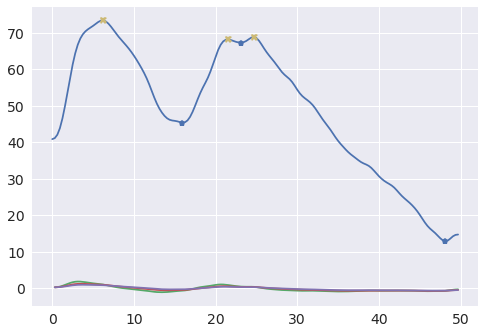

In [231]:
bucket = 'nsfcareer-users-data'
#Make sure you provide / in the end
prefix = '8725074595/simulation/09-17-2020/'
ImpactID = 0

client = boto3.client('s3')
result = client.list_objects(Bucket=bucket, Prefix=prefix, Delimiter='/')
#print(result)

#initialize input feature table
InpFeat = pd.DataFrame(columns=['laXMax','laYMax','laZMax','normlaMax','aaXMax','aaYMax','aaZMax','normaaMax','avXMax','avYMax','avZMax','normavMax',\
                                'laXMin','laYMin','laZMin','normlaMin','aaXMin','aaYMin','aaZMin','normaaMin','avXMin','avYMin','avZMin','normavMin',\
                                'laX_int','laY_int','laZ_int','normla_int','aaX_int','aaY_int','aaZ_int','normaa_int', 'avX_int','avY_int','avZ_int','normav_int',\
                                'abs_laX_int','abs_laY_int','abs_laZ_int','abs_normla_int','abs_aaX_int','abs_aaY_int','abs_aaZ_int','abs_normaa_int', 'abs_avX_int','abs_avY_int','abs_avZ_int','abs_normav_int', \
                                'exp_laX_SR_max', 'exp_laY_SR_max','exp_laZ_SR_max','exp_normla_SR_max','exp_aaX_SR_max','exp_aaY_SR_max','exp_aaZ_SR_max','exp_normaa_SR_max', 'exp_avX_SR_max','exp_avY_SR_max','exp_avZ_SR_max','exp_normav_SR_max',\
                                'exp_laX_SR_min', 'exp_laY_SR_min','exp_laZ_SR_min','exp_normla_SR_min','exp_aaX_SR_min','exp_aaY_SR_min','exp_aaZ_SR_min','exp_normaa_SR_min', 'exp_avX_SR_min','exp_avY_SR_min','exp_avZ_SR_min','exp_normav_SR_min', \
                                'exp_laX_10SR_max', 'exp_laY_10SR_max','exp_laZ_10SR_max','exp_normla_10SR_max','exp_aaX_10SR_max','exp_aaY_10SR_max','exp_aaZ_10SR_max','exp_normaa_10SR_max', 'exp_avX_10SR_max','exp_avY_10SR_max','exp_avZ_10SR_max','exp_normav_10SR_max', \
                                'exp_laX_10SR_min', 'exp_laY_10SR_min','exp_laZ_10SR_min','exp_normla_10SR_min','exp_aaX_10SR_min','exp_aaY_10SR_min','exp_aaZ_10SR_min', 'exp_normaa_10SR_min','exp_avX_10SR_min','exp_avY_10SR_min','exp_avZ_10SR_min', 'exp_normav_10SR_min', \
                                'exp_laX_100SR_max', 'exp_laY_100SR_max','exp_laZ_100SR_max','exp_normla_100SR_max','exp_aaX_100SR_max','exp_aaY_100SR_max','exp_aaZ_100SR_max','exp_normaa_100SR_max','exp_avX_100SR_max','exp_avY_100SR_max','exp_avZ_100SR_max','exp_normav_100SR_max', \
                                'exp_laX_100SR_min', 'exp_laY_100SR_min','exp_laZ_100SR_min','exp_normla_100SR_min','exp_aaX_100SR_min','exp_aaY_100SR_min','exp_aaZ_100SR_min','exp_normaa_100SR_min', 'exp_avX_100SR_min','exp_avY_100SR_min','exp_avZ_100SR_min','exp_normav_100SR_min', \
                                'num_peaks_laX','num_peaks_laY','num_peaks_laZ', 'num_peaks_normla', 'num_peaks_aaX', 'num_peaks_aaY', 'num_peaks_aaZ', 'num_peaks_normaa', 'num_peaks_avX', 'num_peaks_avY', 'num_peaks_avZ','num_peaks_normav', \
                                'num_valleys_laX','num_valleys_laY','num_valleys_laZ', 'num_valleys_normla', 'num_valleys_aaX', 'num_valleys_aaY', 'num_valleys_aaZ', 'num_valleys_normaa', 'num_valleys_avX', 'num_valleys_avY', 'num_valleys_avZ','num_valleys_normav', \
                                'peaks4_laX2', 'peaks4_laX3','peaks4_laX4','peaks4_laX5', \
                                'peaks4_laY2', 'peaks4_laY3','peaks4_laY4','peaks4_laY5', \
                                'peaks4_laZ2', 'peaks4_laZ3','peaks4_laZ4','peaks4_laZ5', \
                                'peaks4_normla2', 'peaks4_normla3','peaks4_normla4','peaks4_normla5', \
                                'peaks4_aaX2', 'peaks4_aaX3','peaks4_aaX4','peaks4_aaX5', \
                                'peaks4_aaY2', 'peaks4_aaY3','peaks4_aaY4','peaks4_aaY5', \
                                'peaks4_aaZ2', 'peaks4_aaZ3','peaks4_aaZ4','peaks4_aaZ5', \
                                'peaks4_normaa2', 'peaks4_normaa3','peaks4_normaa4','peaks4_normaa5', \
                                'peaks4_avX2', 'peaks4_avX3','peaks4_avX4','peaks4_avX5', \
                                'peaks4_avY2', 'peaks4_avY3','peaks4_avY4','peaks4_avY5', \
                                'peaks4_avZ2', 'peaks4_avZ3','peaks4_avZ4','peaks4_avZ5', \
                                'peaks4_normav2', 'peaks4_normav3','peaks4_normav4','peaks4_normav5', \
                                'valley4_laX2', 'valley4_laX3','valley4_laX4','valley4_laX5', \
                                'valley4_laY2', 'valley4_laY3','valley4_laY4','valley4_laY5', \
                                'valley4_laZ2', 'valley4_laZ3','valley4_laZ4','valley4_laZ5', \
                                'valley4_normla2', 'valley4_normla3','valley4_normla4','valley4_normla5', \
                                'valley4_aaX2', 'valley4_aaX3','valley4_aaX4','valley4_aaX5', \
                                'valley4_aaY2', 'valley4_aaY3','valley4_aaY4','valley4_aaY5', \
                                'valley4_aaZ2', 'valley4_aaZ3','valley4_aaZ4','valley4_aaZ5', \
                                'valley4_normaa2', 'valley4_normaa3','valley4_normaa4','valley4_normaa5', \
                                'valley4_avX2', 'valley4_avX3','valley4_avX4','valley4_avX5', \
                                'valley4_avY2', 'valley4_avY3','valley4_avY4','valley4_avY5', \
                                'valley4_avZ2', 'valley4_avZ3','valley4_avZ4','valley4_avZ5', \
                                'valley4_normav2', 'valley4_normav3','valley4_normav4','valley4_normav5'])



# read all the directories in this current date given in prefix above
for o in result.get('CommonPrefixes'):
    #print('ImpactID : ',ImpactID)
    #print('sub folder : ', o.get('Prefix'))
    #print(o)
    prefix2 = o.get('Prefix')
    #print(prefix2)
    IDtemp = os.path.split(prefix2) 
    #print(IDtemp[0])
    # takes last item in the split list
    # should be simulationID
    simulationID = IDtemp[0].split('/')[-1]
    #print('SimulationID : ',simulationID) 
    runit = 0
    # try to find the input.json file 
   
    if simulationID == 'bKakNJIlw':
        print('This is simulationID ',simulationID)
        runit = 1
        
    if runit == 0:
        continue
        
    files = client.list_objects(Bucket=bucket, Prefix=prefix2, Delimiter='/')    
    #print(files)
    for m in files.get('Contents'):
        keyword = 'input.json'
        filestring = m.get('Key')
        #print('subfile : ',m.get('Key'))
        # read the file and stores its values
        if keyword in filestring:
            #print(filestring)
            jsonfile='s3://' + bucket + '/'+ filestring
            #print(jsonfile)
            f = client.get_object(Bucket=bucket, Key=filestring) 
            #print(f)
            #d = json.dumps(f,default = myconverter, indent=2,sort_keys=True)
            #print(d)
            text = f["Body"].read().decode()
            #print(text)
            jo = json.loads(text)
            #print(jo["player"])
            #print(jo["simulation"])
            #print(jo["simulation"]["mesh"])
            #print(jo["simulation"]["linear-acceleration"])
            #print(jo["simulation"]["linear-acceleration"]["xv"])
            #print(jo["simulation"]["linear-acceleration"]["yv"])
            #print(jo["simulation"]["linear-acceleration"]["zv"])
            # save linear acceleration (la)
            laX=jo["simulation"]["linear-acceleration"]["xv"]
            laY=jo["simulation"]["linear-acceleration"]["yv"]
            laZ=jo["simulation"]["linear-acceleration"]["zv"]
            # save linear acceleration time (laT)
            # these should be the same for sensor companies. 
            # we saved different time arrays for the Hardy validation.
            TimeAll=jo["simulation"]["time-all"]
            #laTY=jo["simulation"]["linear-acceleration"]["yt"]
            #laTZ=jo["simulation"]["linear-acceleration"]["zt"]
            # save angular acceleration (aa)
            aaX=jo["simulation"]["angular-acceleration"]["xv"]
            aaY=jo["simulation"]["angular-acceleration"]["yv"]
            aaZ=jo["simulation"]["angular-acceleration"]["zv"]
            # save angular velocity (av)
            avX=jo["simulation"]["angular-velocity"]["xv"]
            avY=jo["simulation"]["angular-velocity"]["yv"]
            avZ=jo["simulation"]["angular-velocity"]["zv"]
            normla = []
            normaa = []
            normav = []
            # linear acceleration
            abs_laX = []; abs_laY = [];abs_laZ = [] ; abs_normla = []
            #  angular acceleration
            abs_aaX = [];abs_aaY = []; abs_aaZ = []; abs_normaa = []
            # angular velocity
            abs_avX = []; abs_avY = []; abs_avZ = []; abs_normav = []
            lst = []
            df = []; data=[]
            diff_laX=[]; diff_laY=[];diff_laZ=[];diff_normla=[];
            diff_aaX=[]; diff_aaY=[];diff_aaZ=[];diff_normaa=[];
            diff_avX=[]; diff_avY=[];diff_avZ=[];diff_normav=[];
            
            exp_laX_SR =[];exp_laY_SR =[];exp_laZ_SR =[];exp_normla_SR =[];
            exp_aaX_SR =[];exp_aaY_SR =[];exp_aaZ_SR =[];exp_normaa_SR =[];
            exp_avX_SR =[];exp_avY_SR =[];exp_avZ_SR =[];exp_normav_SR =[];
            
            exp_laX_10SR =[];exp_laY_10SR =[];exp_laZ_10SR =[];exp_normla_10SR =[];
            exp_aaX_10SR =[];exp_aaY_10SR =[];exp_aaZ_10SR =[];exp_normaa_10SR =[];
            exp_avX_10SR =[];exp_avY_10SR =[];exp_avZ_10SR =[];exp_normav_10SR =[];
            
            exp_laX_100SR =[];exp_laY_100SR =[];exp_laZ_100SR =[];exp_normla_100SR =[];
            exp_aaX_100SR =[];exp_aaY_100SR =[];exp_aaZ_100SR =[];exp_normaa_100SR =[];
            exp_avX_100SR =[];exp_avY_100SR =[];exp_avZ_100SR =[];exp_normav_100SR =[];
            
            maxima_laX = [];maxima_laY = [];maxima_laZ = [];maxima_normla = [];
            maxima_aaX = [];maxima_aaY = [];maxima_aaZ = [];maxima_normaa = [];
            maxima_avX = [];maxima_avY = [];maxima_avZ = [];maxima_normav = [];
            
            peak_indexes_laX = [];peak_indexes_laY = [];peak_indexes_laZ = [];peak_indexes_normla = [];
            peak_indexes_aaX = [];peak_indexes_aaY = [];peak_indexes_aaZ = [];peak_indexes_normaa = [];
            peak_indexes_avX = [];peak_indexes_avY = [];peak_indexes_avZ = [];peak_indexes_normav = [];
            
            valley_indexes_laX = [];valley_indexes_laY = [];valley_indexes_laZ = [];valley_indexes_normla = [];
            valley_indexes_aaX = [];valley_indexes_aaY = [];valley_indexes_aaZ = [];valley_indexes_normaa = [];
            valley_indexes_avX = [];valley_indexes_avY = [];valley_indexes_avZ = [];valley_indexes_normav = [];
            
            valley_5ind_laX = [];valley_5ind_laY = [];valley_5ind_laZ = [];valley_5ind_normla = [];
            valley_5ind_aaX = [];valley_5ind_aaY = [];valley_5ind_aaZ = [];valley_5ind_normaa = [];
            valley_5ind_avX = [];valley_5ind_avY = [];valley_5ind_avZ = [];valley_5ind_normav = [];
            
            # compute magnitude/norm of vectors
            for i in range(len(laTX)): # assumes time array is same length as la, aa and av
                # linear acceleration
                normlai = math.sqrt(laX[i]*laX[i] +  laY[i]*laY[i] + laZ[i]*laZ[i])
                normla.append(normlai)
                # angular acceleration
                normaai = math.sqrt(aaX[i]*aaX[i] +  aaY[i]*aaY[i] + aaZ[i]*aaZ[i])
                normaa.append(normaai)
                # angular velocity
                normavi = math.sqrt(avX[i]*avX[i] +  avY[i]*avY[i] + avZ[i]*avZ[i])
                normav.append(normavi)
                # linear acceleration
                abs_laX.append(abs(laX[i]))
                abs_laY.append(abs(laY[i]))
                abs_laZ.append(abs(laZ[i]))
                abs_normla.append(abs(normla[i]))
                # angular acceleration
                abs_aaX.append(abs(aaX[i]))
                abs_aaY.append(abs(aaY[i]))
                abs_aaZ.append(abs(aaZ[i]))
                abs_normaa.append(abs(normaa[i]))
                # angular velocity
                abs_avX.append(abs(avX[i]))
                abs_avY.append(abs(avY[i]))
                abs_avZ.append(abs(avZ[i]))
                abs_normav.append(abs(normav[i]))
                #print(normlai)
            
            #print(type(laX))
            lst = [TimeAll,laX,laY,laZ,normla,aaX,aaY,aaZ,normaa,avX,avY,avZ,normav]
            df = pd.DataFrame(lst)
            data = df.transpose() 
            data.columns=['Time','laX','laY','laZ','normla','aaX','aaY','aaZ','normaa','avX','avY','avZ','normav'] #Rename the columns
            #if ImpactID == 1:
            #    print(data)
            #
            # compute derivative of time signal
            # linear acceleration
            diff_laX = data.laX.diff()
            diff_laY = data.laY.diff()
            diff_laZ = data.laZ.diff()
            diff_normla = data.normla.diff()
            # angular acceleration
            diff_aaX = data.aaX.diff()
            diff_aaY = data.aaY.diff()
            diff_aaZ = data.aaZ.diff()
            diff_normaa = data.normaa.diff()
            # angular velocity
            diff_avX = data.avX.diff()
            diff_avY = data.avY.diff()
            diff_avZ = data.avZ.diff()
            diff_normav = data.normav.diff()
            #if ImpactID == 1:
            #    print('length of diff_laX : ',len(diff_laX))
             
            # compute expential moving average of the derivative of the time signal with SR
            spanx = 20
            # linear acceleration
            exp_laX_SR = diff_laX.ewm(span = spanx, adjust=False).mean()
            exp_laY_SR = diff_laY.ewm(span = spanx, adjust=False).mean()
            exp_laZ_SR = diff_laZ.ewm(span = spanx, adjust=False).mean()
            exp_normla_SR = diff_normla.ewm(span = spanx, adjust=False).mean()
            # angular acceleration
            exp_aaX_SR = diff_aaX.ewm(span = spanx, adjust=False).mean()
            exp_aaY_SR = diff_aaY.ewm(span = spanx, adjust=False).mean()
            exp_aaZ_SR = diff_aaZ.ewm(span = spanx, adjust=False).mean()
            exp_normaa_SR = diff_normaa.ewm(span = spanx, adjust=False).mean()
            # angular velocity
            exp_avX_SR = diff_avX.ewm(span = spanx, adjust=False).mean()
            exp_avY_SR = diff_avY.ewm(span = spanx, adjust=False).mean()
            exp_avZ_SR = diff_avZ.ewm(span = spanx, adjust=False).mean()
            exp_normav_SR = diff_normav.ewm(span = spanx, adjust=False).mean()
            
            # compute expential moving average of the derivative of the time signal with 10SR
            spanx = 40
            # linear acceleration
            exp_laX_10SR = diff_laX.ewm(span = spanx, adjust=False).mean()
            exp_laY_10SR = diff_laY.ewm(span = spanx, adjust=False).mean()
            exp_laZ_10SR = diff_laZ.ewm(span = spanx, adjust=False).mean()
            exp_normla_10SR = diff_normla.ewm(span = spanx, adjust=False).mean()
            # angular acceleration 
            exp_aaX_10SR = diff_aaX.ewm(span = spanx, adjust=False).mean()
            exp_aaY_10SR = diff_aaY.ewm(span = spanx, adjust=False).mean()
            exp_aaZ_10SR = diff_aaZ.ewm(span = spanx, adjust=False).mean()
            exp_normaa_10SR = diff_normaa.ewm(span = spanx, adjust=False).mean()
            # angular velocity
            exp_avX_10SR = diff_avX.ewm(span = spanx, adjust=False).mean()
            exp_avY_10SR = diff_avY.ewm(span = spanx, adjust=False).mean()
            exp_avZ_10SR = diff_avZ.ewm(span = spanx, adjust=False).mean()
            exp_normav_10SR = diff_normav.ewm(span = spanx, adjust=False).mean()
            
            # compute expential moving average of the derivative of the time signal with 100SR
            spanx = 60
            # linear acceleration
            exp_laX_100SR = diff_laX.ewm(span = spanx, adjust=False).mean()
            exp_laY_100SR = diff_laY.ewm(span = spanx, adjust=False).mean()
            exp_laZ_100SR = diff_laZ.ewm(span = spanx, adjust=False).mean()
            exp_normla_100SR = diff_normla.ewm(span = spanx, adjust=False).mean()
            # angular acceleration
            exp_aaX_100SR = diff_aaX.ewm(span = spanx, adjust=False).mean()
            exp_aaY_100SR = diff_aaY.ewm(span = spanx, adjust=False).mean()
            exp_aaZ_100SR = diff_aaZ.ewm(span = spanx, adjust=False).mean()
            exp_normaa_100SR = diff_normaa.ewm(span = spanx, adjust=False).mean()
            # angular velocity
            exp_avX_100SR = diff_avX.ewm(span = spanx, adjust=False).mean()
            exp_avY_100SR = diff_avY.ewm(span = spanx, adjust=False).mean()
            exp_avZ_100SR = diff_avZ.ewm(span = spanx, adjust=False).mean()
            exp_normav_100SR = diff_normav.ewm(span = spanx, adjust=False).mean()
            #
            # Compute maximum extrema of time signal 
            # linear acceleration
            maxima_laX = argrelextrema(data.laX.values, np.greater, mode = 'clip')
            maxima_laY = argrelextrema(data.laY.values, np.greater)
            maxima_laZ = argrelextrema(data.laZ.values, np.greater)
            maxima_normla = argrelextrema(data.normla.values, np.greater)
            # angular acceleration
            maxima_aaX = argrelextrema(data.aaX.values, np.greater)
            maxima_aaY = argrelextrema(data.aaY.values, np.greater)
            maxima_aaZ = argrelextrema(data.aaZ.values, np.greater)
            maxima_normaa = argrelextrema(data.normaa.values, np.greater)
            # angular velocity
            maxima_avX = argrelextrema(data.avX.values, np.greater)
            maxima_avY = argrelextrema(data.avY.values, np.greater)
            maxima_avZ = argrelextrema(data.avZ.values, np.greater)
            maxima_normav = argrelextrema(data.normav.values, np.greater)
            #
            # get all the peak indices    
            # linear acceleration
            peak_indexes_laX = maxima_laX[0]
            peak_indexes_laY = maxima_laY[0]
            peak_indexes_laZ = maxima_laZ[0]
            peak_indexes_normla = maxima_normla[0]
            # angular acceleration
            peak_indexes_aaX = maxima_aaX[0]
            peak_indexes_aaY = maxima_aaY[0]
            peak_indexes_aaZ = maxima_aaZ[0]
            peak_indexes_normaa = maxima_normaa[0]
            # angular velocity
            peak_indexes_avX = maxima_avX[0]
            peak_indexes_avY = maxima_avY[0]
            peak_indexes_avZ = maxima_avZ[0]
            peak_indexes_normav = maxima_normav[0]
            #if ImpactID == 1:
            #    print('Peaks are: %s' % (peak_indexes_laX))
            #    print('Total Number of maxima extrema: ',len(peak_indexes_laX))  
            #
            # Create plot of curves showing the peaks
            plt.style.use('seaborn')
            plt.plot(data.Time, data.laX, label='laX')
            plt.plot(data.Time, exp_laX_SR, label='laX EMA SR')
            plt.plot(data.Time, exp_laX_10SR, label='laX EMA 10SR')
            plt.plot(data.Time, exp_laX_100SR, label='laX EMA 100SR')
            plt.plot(data.Time[peak_indexes_laX],data.laX[peak_indexes_laX], 'X', label='peaks')
            #
            # extract top 4 peak indices, note the first peak is already saved.
            peaks4_laX = compute_4_maxima(peak_indexes_laX)
            peaks4_laY = compute_4_maxima(peak_indexes_laY)
            peaks4_laZ = compute_4_maxima(peak_indexes_laZ)
            peaks4_normla = compute_4_maxima(peak_indexes_normla)
            peaks4_aaX = compute_4_maxima(peak_indexes_aaX)
            peaks4_aaY = compute_4_maxima(peak_indexes_aaY)
            peaks4_aaZ = compute_4_maxima(peak_indexes_aaZ)
            peaks4_normaa = compute_4_maxima(peak_indexes_normaa)
            peaks4_avX = compute_4_maxima(peak_indexes_avX)
            peaks4_avY = compute_4_maxima(peak_indexes_avY)
            peaks4_avZ = compute_4_maxima(peak_indexes_avZ)
            peaks4_normav = compute_4_maxima(peak_indexes_normav)
            
            print('peaks4_laX : \n', peaks4_laX)
            print(type(peaks4_laX))
            print('peaks4_laY : \n', peaks4_laY)
            print(type(peaks4_laY))
            
            #print(peaks4_laX.size)
            #print(peaks4_laX.iloc[0])
            
    
            #
            #
            # Compute maximum extrema of time signal 
            # linear acceleration
            minima_laX = argrelextrema(data.laX.values, np.less)
            minima_laY = argrelextrema(data.laY.values, np.less)
            minima_laZ = argrelextrema(data.laZ.values, np.less)
            minima_normla = argrelextrema(data.normla.values, np.less)
            # angular acceration 
            minima_aaX = argrelextrema(data.aaX.values, np.less)
            minima_aaY = argrelextrema(data.aaY.values, np.less)
            minima_aaZ = argrelextrema(data.aaZ.values, np.less)
            minima_normaa = argrelextrema(data.normaa.values, np.less)
            # angular velocity
            minima_avX = argrelextrema(data.avX.values, np.less)
            minima_avY = argrelextrema(data.avY.values, np.less)
            minima_avZ = argrelextrema(data.avZ.values, np.less)
            minima_normav = argrelextrema(data.normav.values, np.less)
            #print(minima_laX[0])
            #
            # get all the valley minima indices  
            # linear acceleration
            valley_indexes_laX = minima_laX[0]
            valley_indexes_laY = minima_laY[0]
            valley_indexes_laZ = minima_laZ[0]
            valley_indexes_normla = minima_normla[0]
            # angular acceleration 
            valley_indexes_aaX = minima_aaX[0]
            valley_indexes_aaY = minima_aaY[0]
            valley_indexes_aaZ = minima_aaZ[0]
            valley_indexes_normaa = minima_normaa[0]
            # angular velocity
            valley_indexes_avX = minima_avX[0]
            valley_indexes_avY = minima_avY[0]
            valley_indexes_avZ = minima_avZ[0]
            valley_indexes_normav = minima_normav[0]
            #print('Valleys are: %s' % (valley_indexes_laX))
            #print('Number of minima extrema: ',len(valley_indexes_laX))           
            #
            # extract top 5 valley indices
            valley4_laX = compute_4_minima(valley_indexes_laX)
            valley4_laY = compute_4_minima(valley_indexes_laY)
            valley4_laZ = compute_4_minima(valley_indexes_laZ)
            valley4_normla = compute_4_minima(valley_indexes_normla)
            
            valley4_aaX = compute_4_minima(valley_indexes_aaX)
            valley4_aaY = compute_4_minima(valley_indexes_aaY)
            valley4_aaZ = compute_4_minima(valley_indexes_aaZ)
            valley4_normaa = compute_4_minima(valley_indexes_normaa)
            
            valley4_avX = compute_4_minima(valley_indexes_avX)
            valley4_avY = compute_4_minima(valley_indexes_avY)
            valley4_avZ = compute_4_minima(valley_indexes_avZ)
            valley4_normav = compute_4_minima(valley_indexes_normav)
            
            #print(valley4_laX)
            #print(data.laX[valley_indexes_laX[valley_5ind_laX]])
            #print(data.laX[valley_indexes_laX[valley_5ind_laX.iloc[0]]])
            #
            # add peaks to plot 
            plt.plot(data.Time[peak_indexes_laX[peak_5ind_laX]],data.laX[peak_indexes_laX[peak_5ind_laX]], 'o', label='5 max peaks')
            plt.plot(data.Time[valley_indexes_laX],data.laX[valley_indexes_laX], 'p', label='valleys')
            plt.plot(data.Time[valley_indexes_laX[valley_5ind_laX]],data.laX[valley_indexes_laX[valley_5ind_laX]], 's', label='5 min valleys')
            # modify ticks size
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            #
            #max values
            InpFeat.at[ImpactID, 'laXMax'] = data['laX'].max()
            InpFeat.at[ImpactID, 'laYMax'] = data['laY'].max()
            InpFeat.at[ImpactID, 'laZMax'] = data['laZ'].max()
            InpFeat.at[ImpactID, 'normlaMax'] = data['normla'].max()
            InpFeat.at[ImpactID, 'aaXMax'] = data['aaX'].max()
            InpFeat.at[ImpactID, 'aaYMax'] = data['aaY'].max()
            InpFeat.at[ImpactID, 'aaZMax'] = data['aaZ'].max()
            InpFeat.at[ImpactID, 'normaaMax'] = data['normaa'].max()
            InpFeat.at[ImpactID, 'avXMax'] = data['avX'].max()
            InpFeat.at[ImpactID, 'avYMax'] = data['avY'].max()
            InpFeat.at[ImpactID, 'avZMax'] = data['avZ'].max()
            InpFeat.at[ImpactID, 'normavMax'] = data['normav'].max()
            #
            # min values
            InpFeat.at[ImpactID, 'laXMin'] = data['laX'].max()
            InpFeat.at[ImpactID, 'laYMin'] = data['laY'].min()
            InpFeat.at[ImpactID, 'laZMin'] = data['laZ'].min()
            InpFeat.at[ImpactID, 'normlaMin'] = data['normla'].min()
            InpFeat.at[ImpactID, 'aaXMin'] = data['aaX'].min()
            InpFeat.at[ImpactID, 'aaYMin'] = data['aaY'].min()
            InpFeat.at[ImpactID, 'aaZMin'] = data['aaZ'].min()
            InpFeat.at[ImpactID, 'normaaMin'] = data['normaa'].min()
            InpFeat.at[ImpactID, 'avXMin'] = data['avX'].min()
            InpFeat.at[ImpactID, 'avYMin'] = data['avY'].min()
            InpFeat.at[ImpactID, 'avZMin'] = data['avZ'].min()
            InpFeat.at[ImpactID, 'normavMin'] = data['normav'].min()
            #
            # Integral of the time-signal
            InpFeat.at[ImpactID, 'laX_int'] = integrate.trapz(laX)
            InpFeat.at[ImpactID, 'laY_int'] = integrate.trapz(laY)
            InpFeat.at[ImpactID, 'laZ_int'] = integrate.trapz(laZ)
            InpFeat.at[ImpactID, 'normla_int'] = integrate.trapz(normla)
            InpFeat.at[ImpactID, 'aaX_int'] = integrate.trapz(aaX)
            InpFeat.at[ImpactID, 'aaY_int'] = integrate.trapz(aaY)
            InpFeat.at[ImpactID, 'aaZ_int'] = integrate.trapz(aaZ)
            InpFeat.at[ImpactID, 'normaa_int'] = integrate.trapz(normaa)
            InpFeat.at[ImpactID, 'avX_int'] = integrate.trapz(avX)
            InpFeat.at[ImpactID, 'avY_int'] = integrate.trapz(avY)
            InpFeat.at[ImpactID, 'avZ_int'] = integrate.trapz(avZ)
            InpFeat.at[ImpactID, 'normav_int'] = integrate.trapz(normav)
            #
            # Integral of the absolute values of time-signal
            InpFeat.at[ImpactID, 'abs_laX_int'] = integrate.trapz(abs_laX)
            InpFeat.at[ImpactID, 'abs_laY_int'] = integrate.trapz(abs_laY)
            InpFeat.at[ImpactID, 'abs_laZ_int'] = integrate.trapz(abs_laZ)
            InpFeat.at[ImpactID, 'abs_normla_int'] = integrate.trapz(abs_normla)
            InpFeat.at[ImpactID, 'abs_aaX_int'] = integrate.trapz(abs_aaX)
            InpFeat.at[ImpactID, 'abs_aaY_int'] = integrate.trapz(abs_aaY)
            InpFeat.at[ImpactID, 'abs_aaZ_int'] = integrate.trapz(abs_aaZ)
            InpFeat.at[ImpactID, 'abs_normaa_int'] = integrate.trapz(abs_normaa)
            InpFeat.at[ImpactID, 'abs_avX_int'] = integrate.trapz(abs_avX)
            InpFeat.at[ImpactID, 'abs_avY_int'] = integrate.trapz(abs_avY)
            InpFeat.at[ImpactID, 'abs_avZ_int'] = integrate.trapz(abs_avZ)
            InpFeat.at[ImpactID, 'abs_normav_int'] = integrate.trapz(abs_normav)
            #
            # maximum of expential moving average of the derivative of the time signal with SR
            InpFeat.at[ImpactID, 'exp_laX_SR_max'] = exp_laX_SR.max()
            InpFeat.at[ImpactID, 'exp_laY_SR_max'] = exp_laY_SR.max()
            InpFeat.at[ImpactID, 'exp_laZ_SR_max'] = exp_laZ_SR.max()
            InpFeat.at[ImpactID, 'exp_normla_SR_max'] = exp_normla_SR.max()
            InpFeat.at[ImpactID, 'exp_aaX_SR_max'] = exp_aaX_SR.max()
            InpFeat.at[ImpactID, 'exp_aaY_SR_max'] = exp_aaY_SR.max()
            InpFeat.at[ImpactID, 'exp_aaZ_SR_max'] = exp_aaZ_SR.max()
            InpFeat.at[ImpactID, 'exp_normaa_SR_max'] = exp_normaa_SR.max()
            InpFeat.at[ImpactID, 'exp_avX_SR_max'] = exp_avX_SR.max()
            InpFeat.at[ImpactID, 'exp_avY_SR_max'] = exp_avY_SR.max()
            InpFeat.at[ImpactID, 'exp_avZ_SR_max'] = exp_avZ_SR.max()
            InpFeat.at[ImpactID, 'exp_normav_SR_max'] = exp_normav_SR.max()
            #
            # minimum of expential moving average of the derivative of the time signal with SR
            InpFeat.at[ImpactID, 'exp_laX_SR_min'] = exp_laX_SR.min()
            InpFeat.at[ImpactID, 'exp_laY_SR_min'] = exp_laY_SR.min()
            InpFeat.at[ImpactID, 'exp_laZ_SR_min'] = exp_laZ_SR.min()
            InpFeat.at[ImpactID, 'exp_normla_SR_min'] = exp_normla_SR.min()
            InpFeat.at[ImpactID, 'exp_aaX_SR_min'] = exp_aaX_SR.min()
            InpFeat.at[ImpactID, 'exp_aaY_SR_min'] = exp_aaY_SR.min()
            InpFeat.at[ImpactID, 'exp_aaZ_SR_min'] = exp_aaZ_SR.min()
            InpFeat.at[ImpactID, 'exp_normaa_SR_min'] = exp_normaa_SR.min()
            InpFeat.at[ImpactID, 'exp_avX_SR_min'] = exp_avX_SR.min()
            InpFeat.at[ImpactID, 'exp_avY_SR_min'] = exp_avY_SR.min()
            InpFeat.at[ImpactID, 'exp_avZ_SR_min'] = exp_avZ_SR.min()
            InpFeat.at[ImpactID, 'exp_normav_SR_min'] = exp_normav_SR.min()
            #
            # maximum of expential moving average of the derivative of the time signal with 10SR
            InpFeat.at[ImpactID, 'exp_laX_10SR_max'] = exp_laX_10SR.max()
            InpFeat.at[ImpactID, 'exp_laY_10SR_max'] = exp_laY_10SR.max()
            InpFeat.at[ImpactID, 'exp_laZ_10SR_max'] = exp_laZ_10SR.max()
            InpFeat.at[ImpactID, 'exp_normla_10SR_max'] = exp_normla_10SR.max()
            InpFeat.at[ImpactID, 'exp_aaX_10SR_max'] = exp_aaX_10SR.max()
            InpFeat.at[ImpactID, 'exp_aaY_10SR_max'] = exp_aaY_10SR.max()
            InpFeat.at[ImpactID, 'exp_aaZ_10SR_max'] = exp_aaZ_10SR.max()
            InpFeat.at[ImpactID, 'exp_normaa_10SR_max'] = exp_normaa_10SR.max()
            InpFeat.at[ImpactID, 'exp_avX_10SR_max'] = exp_avX_10SR.max()
            InpFeat.at[ImpactID, 'exp_avY_10SR_max'] = exp_avY_10SR.max()
            InpFeat.at[ImpactID, 'exp_avZ_10SR_max'] = exp_avZ_10SR.max()
            InpFeat.at[ImpactID, 'exp_normav_10SR_max'] = exp_normav_10SR.max()
            #
            # minimum of expential moving average of the derivative of the time signal with 10SR
            InpFeat.at[ImpactID, 'exp_laX_10SR_min'] = exp_laX_10SR.min()
            InpFeat.at[ImpactID, 'exp_laY_10SR_min'] = exp_laY_10SR.min()
            InpFeat.at[ImpactID, 'exp_laZ_10SR_min'] = exp_laZ_10SR.min()
            InpFeat.at[ImpactID, 'exp_normla_10SR_min'] = exp_normla_10SR.min()
            InpFeat.at[ImpactID, 'exp_aaX_10SR_min'] = exp_aaX_10SR.min()
            InpFeat.at[ImpactID, 'exp_aaY_10SR_min'] = exp_aaY_10SR.min()
            InpFeat.at[ImpactID, 'exp_aaZ_10SR_min'] = exp_aaZ_10SR.min()
            InpFeat.at[ImpactID, 'exp_normaa_10SR_min'] = exp_normaa_10SR.min()
            InpFeat.at[ImpactID, 'exp_avX_10SR_min'] = exp_avX_10SR.min()
            InpFeat.at[ImpactID, 'exp_avY_10SR_min'] = exp_avY_10SR.min()
            InpFeat.at[ImpactID, 'exp_avZ_10SR_min'] = exp_avZ_10SR.min()
            InpFeat.at[ImpactID, 'exp_normav_10SR_min'] = exp_normav_10SR.min()
            #
            # maximum of expential moving average of the derivative of the time signal with 100SR
            InpFeat.at[ImpactID, 'exp_laX_100SR_max'] = exp_laX_100SR.max()
            InpFeat.at[ImpactID, 'exp_laY_100SR_max'] = exp_laY_100SR.max()
            InpFeat.at[ImpactID, 'exp_laZ_100SR_max'] = exp_laZ_100SR.max()
            InpFeat.at[ImpactID, 'exp_normla_100SR_max'] = exp_normla_100SR.max()
            InpFeat.at[ImpactID, 'exp_aaX_100SR_max'] = exp_aaX_100SR.max()
            InpFeat.at[ImpactID, 'exp_aaY_100SR_max'] = exp_aaY_100SR.max()
            InpFeat.at[ImpactID, 'exp_aaZ_100SR_max'] = exp_aaZ_100SR.max()
            InpFeat.at[ImpactID, 'exp_normaa_100SR_max'] = exp_normaa_100SR.max()
            InpFeat.at[ImpactID, 'exp_avX_100SR_max'] = exp_avX_100SR.max()
            InpFeat.at[ImpactID, 'exp_avY_100SR_max'] = exp_avY_100SR.max()
            InpFeat.at[ImpactID, 'exp_avZ_100SR_max'] = exp_avZ_100SR.max()
            InpFeat.at[ImpactID, 'exp_normav_100SR_max'] = exp_normav_100SR.max()
            #
            # minimum of expential moving average of the derivative of the time signal with 100SR
            InpFeat.at[ImpactID, 'exp_laX_100SR_min'] = exp_laX_100SR.min()
            InpFeat.at[ImpactID, 'exp_laY_100SR_min'] = exp_laY_100SR.min()
            InpFeat.at[ImpactID, 'exp_laZ_100SR_min'] = exp_laZ_100SR.min()
            InpFeat.at[ImpactID, 'exp_normla_100SR_min'] = exp_normla_100SR.min()
            InpFeat.at[ImpactID, 'exp_aaX_100SR_min'] = exp_aaX_100SR.min()
            InpFeat.at[ImpactID, 'exp_aaY_100SR_min'] = exp_aaY_100SR.min()
            InpFeat.at[ImpactID, 'exp_aaZ_100SR_min'] = exp_aaZ_100SR.min()
            InpFeat.at[ImpactID, 'exp_normaa_100SR_min'] = exp_normaa_100SR.min()
            InpFeat.at[ImpactID, 'exp_avX_100SR_min'] = exp_avX_100SR.min()
            InpFeat.at[ImpactID, 'exp_avY_100SR_min'] = exp_avY_100SR.min()
            InpFeat.at[ImpactID, 'exp_avZ_100SR_min'] = exp_avZ_100SR.min()
            InpFeat.at[ImpactID, 'exp_normav_100SR_min'] = exp_normav_100SR.min()
            #
            # number of maximum extrema 
            InpFeat.at[ImpactID, 'num_peaks_laX'] = len(peak_indexes_laX)
            InpFeat.at[ImpactID, 'num_peaks_laY'] = len(peak_indexes_laY)
            InpFeat.at[ImpactID, 'num_peaks_laZ'] = len(peak_indexes_laZ)
            InpFeat.at[ImpactID, 'num_peaks_normla'] = len(peak_indexes_normla)
            InpFeat.at[ImpactID, 'num_peaks_aaX'] = len(peak_indexes_aaX)
            InpFeat.at[ImpactID, 'num_peaks_aaY'] = len(peak_indexes_aaY)
            InpFeat.at[ImpactID, 'num_peaks_aaZ'] = len(peak_indexes_aaZ)
            InpFeat.at[ImpactID, 'num_peaks_normaa'] = len(peak_indexes_normaa)
            InpFeat.at[ImpactID, 'num_peaks_avX'] = len(peak_indexes_avX)
            InpFeat.at[ImpactID, 'num_peaks_avY'] = len(peak_indexes_avY)
            InpFeat.at[ImpactID, 'num_peaks_avZ'] = len(peak_indexes_avZ)
            InpFeat.at[ImpactID, 'num_peaks_normav'] = len(peak_indexes_normav)
            #
            # number of minima extrema 
            InpFeat.at[ImpactID, 'num_valleys_laX'] = len(valley_indexes_laX)
            InpFeat.at[ImpactID, 'num_valleys_laY'] = len(valley_indexes_laY)
            InpFeat.at[ImpactID, 'num_valleys_laZ'] = len(valley_indexes_laZ)
            InpFeat.at[ImpactID, 'num_valleys_normla'] = len(valley_indexes_normla)
            InpFeat.at[ImpactID, 'num_valleys_aaX'] = len(valley_indexes_aaX)
            InpFeat.at[ImpactID, 'num_valleys_aaY'] = len(valley_indexes_aaY)
            InpFeat.at[ImpactID, 'num_valleys_aaZ'] = len(valley_indexes_aaZ)
            InpFeat.at[ImpactID, 'num_valleys_normaa'] = len(valley_indexes_normaa)
            InpFeat.at[ImpactID, 'num_valleys_avX'] = len(valley_indexes_avX)
            InpFeat.at[ImpactID, 'num_valleys_avY'] = len(valley_indexes_avY)
            InpFeat.at[ImpactID, 'num_valleys_avZ'] = len(valley_indexes_avZ)
            InpFeat.at[ImpactID, 'num_valleys_normav'] = len(valley_indexes_normav)
            
            # top 5 extrema peaks for laX
            #InpFeat.at[ImpactID, 'peak_5ind_laX1'] = data.laX[peak_indexes_laX[peak_5ind_laX.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_laX2'] = peaks4_laX.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_laX3'] = peaks4_laX.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_laX4'] = peaks4_laX.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_laX5'] = peaks4_laX.iloc[4]
            
            print(peaks4_laX.iloc[1])
            print(peaks4_laX.iloc[2])
            print(type(peaks4_laX))
            #print(peaks4_laY)
            #print(peaks4_laY.index[1])
            print(peaks4_laY.iloc[1])
            #print(peaks4_laY.index[2])
            print(peaks4_laY.iloc[2])
            print(type(peaks4_laY))
            
            # top 5 extrema peaks for laY
            #InpFeat.at[ImpactID, 'peak_5ind_laY1'] = data.laY[peak_indexes_laY[peak_5ind_laY.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_laY2'] = peaks4_laY.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_laY3'] = peaks4_laY.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_laY4'] = peaks4_laY.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_laY5'] = peaks4_laY.iloc[4]
            
            
            # top 5 extrema peaks for laZ
            #InpFeat.at[ImpactID, 'peak_5ind_laZ1'] = data.laZ[peak_indexes_laZ[peak_5ind_laZ.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_laZ2'] = peaks4_laZ.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_laZ3'] = peaks4_laZ.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_laZ4'] = peaks4_laZ.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_laZ5'] = peaks4_laZ.iloc[4]
            # top 5 extrema peaks for normla
            #InpFeat.at[ImpactID, 'peak_5ind_normla1'] = data.normla[peak_indexes_normla[peak_5ind_normla.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_normla2'] = peaks4_normla.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_normla3'] = peaks4_normla.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_normla4'] = peaks4_normla.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_normla5'] = peaks4_normla.iloc[4]
            # top 5 extrema peaks for aaX
            #InpFeat.at[ImpactID, 'peak_5ind_aaX1'] = data.aaX[peak_indexes_aaX[peak_5ind_aaX.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_aaX2'] = peaks4_aaX.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_aaX3'] = peaks4_aaX.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_aaX4'] = peaks4_aaX.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_aaX5'] = peaks4_aaX.iloc[4]
            # top 5 extrema peaks for aaY
            #InpFeat.at[ImpactID, 'peak_5ind_aaY1'] = data.aaY[peak_indexes_aaY[peak_5ind_aaY.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_aaY2'] = peaks4_aaY.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_aaY3'] = peaks4_aaY.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_aaY4'] = peaks4_aaY.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_aaY5'] = peaks4_aaY.iloc[4]
            # top 5 extrema peaks for aaZ
            #InpFeat.at[ImpactID, 'peak_5ind_aaZ1'] = data.aaZ[peak_indexes_aaZ[peak_5ind_aaZ.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_aaZ2'] = peaks4_aaZ.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_aaZ3'] = peaks4_aaZ.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_aaZ4'] = peaks4_aaZ.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_aaZ5'] = peaks4_aaZ.iloc[4]
            # top 5 extrema peaks for normaa
            #InpFeat.at[ImpactID, 'peak_5ind_normaa1'] = data.normaa[peak_indexes_normaa[peak_5ind_normaa.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_normaa2'] = peaks4_normaa.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_normaa3'] = peaks4_normaa.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_normaa4'] = peaks4_normaa.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_normaa5'] = peaks4_normaa.iloc[4]
            # top 5 extrema peaks for avX
            #InpFeat.at[ImpactID, 'peak_5ind_avX1'] = data.avX[peak_indexes_avX[peak_5ind_avX.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_avX2'] = peaks4_avX.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_avX3'] = peaks4_avX.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_avX4'] = peaks4_avX.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_avX5'] = peaks4_avX.iloc[4]
            # top 5 extrema peaks for avY
            #InpFeat.at[ImpactID, 'peak_5ind_avY1'] = data.avY[peak_indexes_avY[peak_5ind_avY.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_avY2'] = peaks4_avY.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_avY3'] = peaks4_avY.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_avY4'] = peaks4_avY.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_avY5'] = peaks4_avY.iloc[4]
            # top 5 extrema peaks for avZ
            #InpFeat.at[ImpactID, 'peak_5ind_avZ1'] = data.avZ[peak_indexes_avZ[peak_5ind_avZ.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_avZ2'] = peaks4_avZ.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_avZ3'] = peaks4_avZ.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_avZ4'] = peaks4_avZ.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_avZ5'] = peaks4_avZ.iloc[4]
            # top 5 extrema peaks for normav
            #InpFeat.at[ImpactID, 'peak_5ind_normav1'] = data.normav[peak_indexes_normav[peak_5ind_normav.iloc[0]]]
            InpFeat.at[ImpactID, 'peaks4_normav2'] = peaks4_normav.iloc[1]
            InpFeat.at[ImpactID, 'peaks4_normav3'] = peaks4_normav.iloc[2]
            InpFeat.at[ImpactID, 'peaks4_normav4'] = peaks4_normav.iloc[3]
            InpFeat.at[ImpactID, 'peaks4_normav5'] = peaks4_normav.iloc[4]
            #
            #
            # top 5 minima valleys for laX
            #InpFeat.at[ImpactID, 'valley_5ind_laX1'] = data.laX[valley_indexes_laX[valley_5ind_laX.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_laX2'] = valley4_laX.iloc[1]
            InpFeat.at[ImpactID, 'valley4_laX3'] = valley4_laX.iloc[2]
            InpFeat.at[ImpactID, 'valley4_laX4'] = valley4_laX.iloc[3]
            InpFeat.at[ImpactID, 'valley4_laX5'] = valley4_laX.iloc[4]
            # top 5 minima valleys for laY
            #InpFeat.at[ImpactID, 'valley_5ind_laY1'] = data.laY[valley_indexes_laY[valley_5ind_laY.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_laY2'] = valley4_laY.iloc[1]
            InpFeat.at[ImpactID, 'valley4_laY3'] = valley4_laY.iloc[2]
            InpFeat.at[ImpactID, 'valley4_laY4'] = valley4_laY.iloc[3]
            InpFeat.at[ImpactID, 'valley4_laY5'] = valley4_laY.iloc[4]
            # top 5 minima valleys for laZ
            #InpFeat.at[ImpactID, 'valley_5ind_laZ1'] = data.laZ[valley_indexes_laZ[valley_5ind_laZ.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_laZ2'] = valley4_laZ.iloc[1]
            InpFeat.at[ImpactID, 'valley4_laZ3'] = valley4_laZ.iloc[2]
            InpFeat.at[ImpactID, 'valley4_laZ4'] = valley4_laZ.iloc[3]
            InpFeat.at[ImpactID, 'valley4_laZ5'] = valley4_laZ.iloc[4]
            # top 5 minima valleys for normla
            #InpFeat.at[ImpactID, 'valley_5ind_normla1'] = data.normla[valley_indexes_normla[valley_5ind_normla.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_normla2'] = valley4_normla.iloc[1]
            InpFeat.at[ImpactID, 'valley4_normla3'] = valley4_normla.iloc[2]
            InpFeat.at[ImpactID, 'valley4_normla4'] = valley4_normla.iloc[3]
            InpFeat.at[ImpactID, 'valley4_normla5'] = valley4_normla.iloc[4]
            # top 5 minima valleys for aaX
            #InpFeat.at[ImpactID, 'valley_5ind_aaX1'] = data.aaX[valley_indexes_aaX[valley_5ind_aaX.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_aaX2'] = valley4_aaX.iloc[1]
            InpFeat.at[ImpactID, 'valley4_aaX3'] = valley4_aaX.iloc[2]
            InpFeat.at[ImpactID, 'valley4_aaX4'] = valley4_aaX.iloc[3]
            InpFeat.at[ImpactID, 'valley4_aaX5'] = valley4_aaX.iloc[4]
            # top 5 minima valleys for aaY
            #InpFeat.at[ImpactID, 'valley_5ind_aaY1'] = data.aaY[valley_indexes_aaY[valley_5ind_aaY.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_aaY2'] = valley4_aaY.iloc[1]
            InpFeat.at[ImpactID, 'valley4_aaY3'] = valley4_aaY.iloc[2]
            InpFeat.at[ImpactID, 'valley4_aaY4'] = valley4_aaY.iloc[3]
            InpFeat.at[ImpactID, 'valley4_aaY5'] = valley4_aaY.iloc[4]
            # top 5 minima valleys for aaZ
            #InpFeat.at[ImpactID, 'valley_5ind_aaZ1'] = data.aaZ[valley_indexes_aaZ[valley_5ind_aaZ.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_aaZ2'] = valley4_aaZ.iloc[1]
            InpFeat.at[ImpactID, 'valley4_aaZ3'] = valley4_aaZ.iloc[2]
            InpFeat.at[ImpactID, 'valley4_aaZ4'] = valley4_aaZ.iloc[3]
            InpFeat.at[ImpactID, 'valley4_aaZ5'] = valley4_aaZ.iloc[4]
            # top 5 minima valleys for normaa
            #InpFeat.at[ImpactID, 'valley_5ind_normaa1'] = data.normaa[valley_indexes_normaa[valley_5ind_normaa.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_normaa2'] = valley4_normaa.iloc[1]
            InpFeat.at[ImpactID, 'valley4_normaa3'] = valley4_normaa.iloc[2]
            InpFeat.at[ImpactID, 'valley4_normaa4'] = valley4_normaa.iloc[3]
            InpFeat.at[ImpactID, 'valley4_normaa5'] = valley4_normaa.iloc[4]
            # top 5 minima valleys for avX
            #InpFeat.at[ImpactID, 'valley_5ind_avX1'] = data.avX[valley_indexes_avX[valley_5ind_avX.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_avX2'] = valley4_avX.iloc[1]
            InpFeat.at[ImpactID, 'valley4_avX3'] = valley4_avX.iloc[2]
            InpFeat.at[ImpactID, 'valley4_avX4'] = valley4_avX.iloc[3]
            InpFeat.at[ImpactID, 'valley4_avX5'] = valley4_avX.iloc[4]
            # top 5 minima valleys for avY
            #InpFeat.at[ImpactID, 'valley_5ind_avY1'] = data.avY[valley_indexes_avY[valley_5ind_avY.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_avY2'] = valley4_avY.iloc[1]
            InpFeat.at[ImpactID, 'valley4_avY3'] = valley4_avY.iloc[2]
            InpFeat.at[ImpactID, 'valley4_avY4'] = valley4_avY.iloc[3]
            InpFeat.at[ImpactID, 'valley4_avY5'] = valley4_avY.iloc[4]
            # top 5 minima valleys for avZ
            #InpFeat.at[ImpactID, 'valley_5ind_avZ1'] = data.avZ[valley_indexes_avZ[valley_5ind_avZ.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_avZ2'] = valley4_avZ.iloc[1]
            InpFeat.at[ImpactID, 'valley4_avZ3'] = valley4_avZ.iloc[2]
            InpFeat.at[ImpactID, 'valley4_avZ4'] = valley4_avZ.iloc[3]
            InpFeat.at[ImpactID, 'valley4_avZ5'] = valley4_avZ.iloc[4]
            # top 5 minima valleys for normav
            #InpFeat.at[ImpactID, 'valley_5ind_normav1'] = data.normav[valley_indexes_normav[valley_5ind_normav.iloc[0]]]
            InpFeat.at[ImpactID, 'valley4_normav2'] = valley4_normav.iloc[1]
            InpFeat.at[ImpactID, 'valley4_normav3'] = valley4_normav.iloc[2]
            InpFeat.at[ImpactID, 'valley4_normav4'] = valley4_normav.iloc[3]
            InpFeat.at[ImpactID, 'valley4_normav5'] = valley4_normav.iloc[4]
            #print(InpFeat)
            ImpactID = ImpactID + 1
            #print(jo["linear-acceleration"])

    


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',5)
#print(len(InpFeat))
#print('number of columns : ',len(InpFeat.columns))
#print(InpFeat)
       